In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

import jax
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)
from scipy import optimize
import cvxpy as cp

 # №1

$f(x_1, x_2) = \left( x_1 + x_2^2 \right)^2$

$x = ( 1, 0 )$, $p = ( -1, 1 )$ - is a descent direction

$\min\limits_{\alpha > 0} f(x + \alpha p)$

$p \cdot \nabla f < 0$

$$
\nabla f = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} \right)
$$

$$
\nabla f = \left( 2x_1 + 2x_2^2, 4x_1x_2 + 4x_2^3 \right) = \left( 2, 0 \right)
$$

$$p \cdot \nabla f = -2 < 0$$

$$f(x + \alpha p) = f(x_1 - \alpha, x_2 + \alpha) = \left(x_1 - \alpha + (x_2 + \alpha)^2\right)^2$$

$$f(x+\alpha p) = (x_1 - \alpha + x_2^2 + 2\alpha x_2 + \alpha^2)^2$$

$$f(x + \alpha p) = (1 - \alpha + \alpha^2)^2$$

$$\min\limits_{\alpha > 0} (1 - a + \alpha^2)$$

$$-1 + 2\alpha = 0 \rightarrow \alpha = 0.5$$

# №2

$$y_i = e^{x_i}$$

$$x_i = -3 + 6 * \frac{i-1}{k-1}$$

$$k = 201$$

$$f(x) = \frac{a_0 + a_1x + a_2x^2}{1 + b_1x + b_2x^2}$$

$$\max_{i=1}^k |f(x_i) - y_i| \rightarrow \min$$

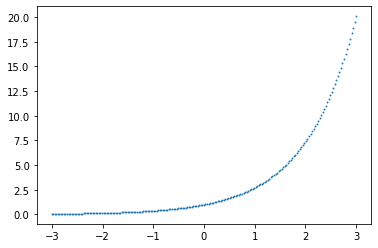

In [2]:
k = 201
X = np.linspace(-3, 3, k)
Y = np.exp(X)
plt.scatter(X, Y, s = 0.8)

In [3]:
def f(x, a):
    return (a[0] + a[1] * x + a[2] * x**2) / (1 + a[3] * x + a[4] * x**2)

def loss(a):
    P = 50
    return jnp.sum((f(X, a) - Y)**P) ** (1/P)

a0 = np.random.normal(size=5)
res = optimize.minimize(
    loss, # Loss function
    a0,   # Initial value
    jac  = jax.grad(loss),
    method = 'BFGS'
)
res


      fun: 0.02414599338255457
 hess_inv: array([[ 1.54535427e-03, -1.19814720e-03, -7.36681862e-04,
        -4.68915576e-04,  1.08380033e-04],
       [-1.19814720e-03,  2.99851151e-03,  1.30017541e-03,
         1.29597969e-03, -3.25750996e-04],
       [-7.36681862e-04,  1.30017541e-03,  8.01681107e-04,
         6.47975802e-04, -1.59232945e-04],
       [-4.68915576e-04,  1.29597969e-03,  6.47975802e-04,
         6.19383848e-04, -1.56180256e-04],
       [ 1.08380033e-04, -3.25750996e-04, -1.59232945e-04,
        -1.56180256e-04,  3.95720526e-05]])
      jac: array([ 1.78310379e-08,  8.32007413e-08,  1.67551744e-07, -8.97417738e-07,
       -2.25094570e-06])
  message: 'Optimization terminated successfully.'
     nfev: 192
      nit: 88
     njev: 192
   status: 0
  success: True
        x: array([ 1.009752  ,  0.61198069,  0.11355026, -0.41455087,  0.04849228])

In [4]:
np.max(f(X, res.x) - Y)

0.023256293448674435

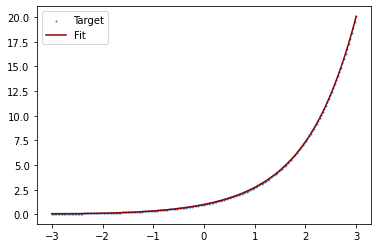

In [5]:
plt.scatter(X, Y, s=0.8, label='Target')
plt.plot(X, f(X, res.x), color='darkred', label="Fit")
plt.legend()

# №3*

# №4

$ u_0 = argmin _{u∈R^d, |u|=1} u^T A u $, A  - симметричная

In [6]:
def get_symm_matrix(N: int):
    b = np.random.random_integers(-10,10, size=(N,N))
    return (b + b.T)/2
A = get_symm_matrix(10)
A

/var/folders/33/pml9j82x2hz0y5wjjt4ws6sm0000gn/T/ipykernel_56858/3477379076.py:2: DeprecationWarning: This function is deprecated. Please call randint(-10, 10 + 1) instead
  b = np.random.random_integers(-10,10, size=(N,N))


array([[ 2. , -1. , -7.5, -1.5,  6.5,  2. ,  2. ,  0.5, -4. ,  6. ],
       [-1. ,  7. ,  7.5,  0. ,  3. ,  4.5,  3. ,  0.5,  1.5, -3.5],
       [-7.5,  7.5,  9. ,  0.5, -2.5, -1.5,  0. ,  3.5, -3. , -7.5],
       [-1.5,  0. ,  0.5, -6. , -3. , -6.5,  1.5,  1.5, -1.5,  5.5],
       [ 6.5,  3. , -2.5, -3. ,  7. ,  3. , -5.5, -1. ,  5.5,  8. ],
       [ 2. ,  4.5, -1.5, -6.5,  3. , -9. , -2. ,  0.5, -2. , -1.5],
       [ 2. ,  3. ,  0. ,  1.5, -5.5, -2. , -6. ,  2. ,  2. ,  7. ],
       [ 0.5,  0.5,  3.5,  1.5, -1. ,  0.5,  2. ,  1. , -9.5,  2.5],
       [-4. ,  1.5, -3. , -1.5,  5.5, -2. ,  2. , -9.5,  1. , -9. ],
       [ 6. , -3.5, -7.5,  5.5,  8. , -1.5,  7. ,  2.5, -9. ,  2. ]])

In [7]:
# для сверки
eigenvalues = np.linalg.eigvals(A)
print(sorted(eigenvalues)[:2])

[-20.638800599043424, -15.679194789113305]


# №5 

In [8]:
data5 = np.array(list(pd.read_pickle("data/data_sensors.pickle").values()))
# все вектора двухмерные
i, j, n = data5[:, 0], data5[:, 1], data5[:, 2]

/var/folders/33/pml9j82x2hz0y5wjjt4ws6sm0000gn/T/ipykernel_56858/3700600260.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data5 = np.array(list(pd.read_pickle("data/data_sensors.pickle").values()))


# №6

/var/folders/33/pml9j82x2hz0y5wjjt4ws6sm0000gn/T/ipykernel_56858/1815392493.py:5: RuntimeWarning: divide by zero encountered in divide
  Z1 = X / Y
/var/folders/33/pml9j82x2hz0y5wjjt4ws6sm0000gn/T/ipykernel_56858/1815392493.py:5: RuntimeWarning: invalid value encountered in divide
  Z1 = X / Y


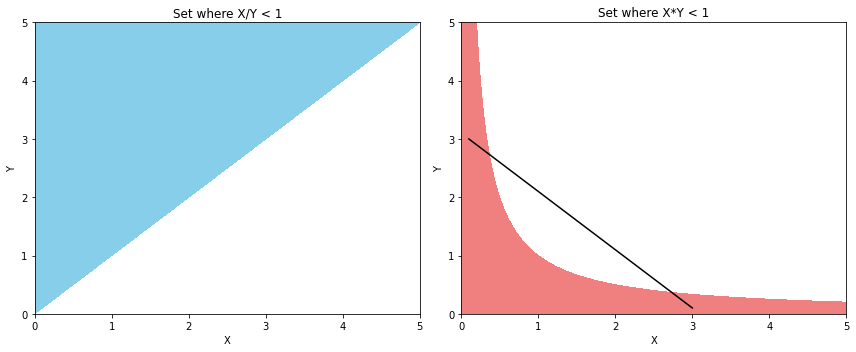

In [9]:
# R^2_{++} -- set of positive real numbers
x = np.linspace(0, 5, 400)
y = np.linspace(0, 5, 400)
X, Y = np.meshgrid(x, y)
Z1 = X / Y
Z2 = X * Y

# Plot x/y 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(X, Y, Z1, levels=[-np.inf, 1], colors='skyblue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Set where X/Y < 1')

# Plot x*y 
plt.subplot(1, 2, 2)
plt.contourf(X, Y, Z2, levels=[-np.inf, 1], colors='lightcoral')
plt.plot([0.1, 3], [3, 0.1], color = "black") # контрпример, множество не выпуклое
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Set where X*Y < 1')

plt.tight_layout()
plt.show()
# a, b, d -- выпуклые, d -- не выпуклое


# №7

(a) f$(x, y) = x^2/y, y>0$

$$\nabla^2 f  = \left( \begin{matrix} \frac{2}{y} & \frac{-2x}{y^2}  \\ \frac{-2x}{y^2}& \frac{2x^2}{y^3} \end{matrix} \right)$$

$\forall v$: $v^T \nabla^2 f(x) v = \frac{2}{y} \left( v_1^2 + \frac{x^2 v_2^2}{y^2} - \frac{2v_1v_2x}{y} \right) = \frac{2}{y} \left( v_1 - \frac{v_2 x}{y} \right)^2 > 0$


(b)

(c) $f(x) = ln \sum_{k=1}^n e^{x_k}$, $x \in R^n$

$$\nabla^2 f = \left( \begin{matrix} \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1\partial x_2} & ... \\ ... & ... & ... \end{matrix} \right)$$

$$\frac{\partial^2 f}{\partial x_i^2} = \frac{\partial}{\partial x_i}\left(\frac{1}{\sum_{k=1}^n e^{x_k}} e^{x_i}\right)$$

$$\frac{\partial^2 f}{\partial x_i^2} = \frac{1}{\sum_{k=1}^n e^{x_k}}e^{x_i} - \frac{1}{\left(\sum_{k=1}^n e^{x_k}\right)^2}e^{2x_i}$$

$$\frac{\partial^2 f}{\partial x_i\partial x_j} = \frac{\partial}{\partial x_j} \left( \frac{1}{\sum_{k=1}^ne^{x_k}} e^{x_i} \right)$$

$$\frac{\partial^2 f}{\partial x_i\partial x_j} = -\frac{1}{\left(\sum e^{x_k}\right)^2}e^{x_i + x_j}$$

$$\xi = \left( e^{x_1}, e^{x_2}, ... \right)$$

$$\nabla^2 f = \frac{1}{\vec 1 \cdot \xi} \text{diag} (\xi) - \frac{1}{\left(\vec 1 \cdot \xi\right)^2} \xi\xi^T$$

$\forall v$: $v^T \nabla^2 f(x) v \ge 0$

$$\frac{\sum \xi_i v_i^2}{\sum \xi_i} - \frac{(\sum v_i \xi_i)^2}{\left(\sum \xi_i\right)^2} \ge 0$$

# №8

# №10

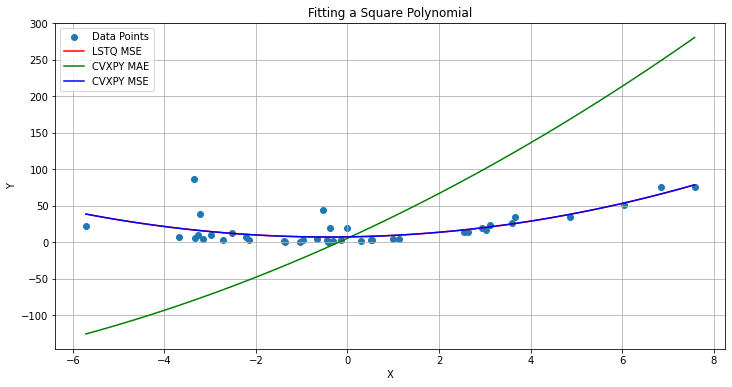

In [18]:
exq10_data = np.load('data/data_fit.npz')
x, y = exq10_data["x"], exq10_data["y"]
A = np.vstack([x**2, x, np.ones_like(x)]).T
coefficients_lstsq, _, _, _ = np.linalg.lstsq(A, y, rcond=None)

a = cp.Variable()
b = cp.Variable()
c = cp.Variable()

cp.Problem(cp.Minimize(cp.abs(cp.sum(a*x**2 + b*x + c - y)))).solve()
coefficients_l1 = [a.value, b.value, c.value]

cp.Problem(cp.Minimize(cp.sum_squares(a*x**2 + b*x + c - y))).solve()
coefficients_l2 = [a.value, b.value, c.value]


x_fit = np.linspace(min(x), max(x), 100)
y_fit_lstsq = coefficients_lstsq[0] * x_fit**2 + coefficients_lstsq[1] * x_fit + coefficients_lstsq[2]
y_fit_l1 = coefficients_l1[0] * x_fit**2 + coefficients_l1[1] * x_fit + coefficients_l1[2]
y_fit_l2 = coefficients_l2[0] * x_fit**2 + coefficients_l2[1] * x_fit + coefficients_l2[2]


# Plot the data points and the fitted polynomial curve
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Data Points')
plt.plot(x_fit, y_fit_lstsq, color='red', label='LSTQ MSE')
plt.plot(x_fit, y_fit_l1, color='green', label='CVXPY MAE')
plt.plot(x_fit, y_fit_l2, color='blue', label='CVXPY MSE')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitting a Square Polynomial')
plt.legend()
plt.grid(True)
plt.show()

# оптимизировать MSE по сравнению с MAE лучше
# с MSE CVXPY и np.linalg.lstsq справились одинаково

# №11

# №12

$$y_i = a \cdot x_i + \epsilon_i$$

Minimize: $L_n(a) = \sum\limits_i \left( y_i - a \cdot x_i \right)^2 + \lambda \|a\|_n$

In [11]:
ex7_data_path = 'data/data_regr.npz'
ex7_data = np.load(ex7_data_path)
ex7_data

In [12]:
X = ex7_data['X']
y = ex7_data['y']
X.shape, y.shape

((200, 100), (200,))

In [13]:
n = y.shape[0]
k = X.shape[1]
n,k

(200, 100)

In [14]:
def solve(l):
    a = cp.Variable(k)
    loss = cp.sum((y - X @ a)**2) + l * cp.norm(a, 2)
    objective = cp.Minimize(loss)
    problem = cp.Problem(objective, None)
    return problem.solve(), a.value

/Users/zugzvangg/.pyenv/versions/3.10.5/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


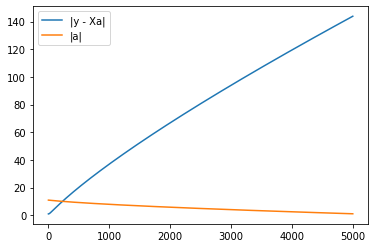

In [15]:
ls = np.linspace(0, 5000, 500)
rs = np.zeros(ls.shape)
an = np.zeros(rs.shape)
for i in range(ls.shape[0]):
    print(f"{i=}", end='\r')
    _, a1 = solve(ls[i])
    rs[i] = np.linalg.norm(y - X @ a1)
    an[i] = np.linalg.norm(a1)

plt.plot(ls, rs, label='|y - Xa|')
plt.plot(ls, an, label='|a|')
plt.legend()

# №13

Find: $r \in R^2$ - source

Given $r_1, r_2, ..., r_m \in R^2$ - detectors

Given $d_1, d_2, ..., d_m \in R$ - distances $\|r-r_k\|_2$

$$L(r) = \sum\left( \|r-r_k\|_2^2 - d_k^2 \right)^2$$

$\min\limits_{r,t} \sum(t + \|r_k\|^2  2r\cdot r_k -d_k^2)^2$ s.t. $\|r\|_2^2=t$

$\bar L (x,y,t) = \sum(t + \|r_k\|^2 - 2r \cdot r_k - d_k^2)^2 + \lambda (\|r\|^2 - t)$